# Assignment 4 #

Note. Not all of these exercises have autochecking. This is because it is hard to verify plots by code. I will check these manually. In addition, the probability based algorithms may give different results depending on the seed, so I will grade these by hand as well. As these problems are more involved, each problem will be worth 6 points (and the bonus problems will be worth 3 points each).

Run the cell of code below before starting the assignment.

In [3]:
import assignment4checker as ck

## Problem 1 ##
### Spectral Radius ###
Suppose a $n \times n$ matrix, $A$ has eigenvalues $\{\lambda_1,\lambda_2,\dots,\lambda_n\}$. The spectral radius of $A$ is defined as 

$$ \rho(A) = \max \{|\lambda_1|,|\lambda_2|,\dots,|\lambda_n|\}$$
Create code that takes a $n\times n$ Numpy array $A$ and returns its spectral radius.

In [4]:
def problem1(A):
    '''Given an n x n numpy float array, return the spectral radius of A
    
    inputs:
        A: A n time n numpy float array
        
    outputs:
        spec: The spectral radius of A'''
    
    import numpy as np
    
    vals = np.linalg.eig(A)[0]
    absvals = np.abs(vals)
    
    spec = np.max(absvals)
    
    return spec


In [5]:
ck.p1(problem1)

Test case 1 was successful.
Test case 2 was successful.
Test case 3 was successful.
Test case 4 was successful.
Test case 5 was successful.
Test case 6 was successful.


## Problem 2 ##
### Emirp ###

A prime number is an Emirp (This is the word prime backwards), if it is still a prime number when written backwards. An emirp need not be a palindrome. Create a function that checks given a positive integer $n$ if $n$ is an Emirp.

**Example 1:** $17$ is an emirp as $71$ is also prime

**Example 2:** $23$ is not an emirp as $32$ is not prime

**Example 3:** $32$ is not an emirp because $32$ is not prime (even though $23$ is prime)

In [6]:
def problem2(n):
    '''Given a positive integer n, determine if n is an emirp
    
    inputs:
        n: A positive integer
        
    outputs:
        isemirp: A boolean that is True if n is an emirp, and false otherwise.'''
    
    #This is the code for generating primes using the Sieve of Eratosthenes
    def sieve(n):
        '''This function returns all the primes below n as an array using the Sieve of Eratosthenes.'''
        import numpy as np
        #Create an array of 1s
        A=np.ones((n,), dtype = bool)
        #This tells us the values we search through. We are using the Sieve Eratosthenes
        for i in range(2, int(n**0.5+1)):
            if (A[i]):
                #Check every i values starting at i**2
                A[i*i::i] = False

        #Takes the indices with non-zero values and removes 0 and 1 from it
        primes = np.delete(np.nonzero(A),[0,1],1)
        return primes[0]
    
    
    #Generate the primes up the number of digits of n
    numdigs = len(str(n)) + 1
    
    primes = sieve(10**numdigs)
    
    if n in primes and int(str(n)[::-1]) in primes:
        return True
    else:
        return False
    

In [7]:
ck.p2(problem2)

Test case 1 was successful.
Test case 2 was successful.
Test case 3 was successful.
Test case 4 was successful.
Test case 5 was successful.
Test case 6 was successful.


## Problem 3 ##
### Euler's Method ###
Euler's Method allows us to approximate first order ordinary differential equations. The process is detailed here: https://tutorial.math.lamar.edu/classes/de/eulersmethod.aspx

Given a differential equation of the form: $y'(t) = f(t,y)$, a step size, $h$, an initial point $(t_0,y_0)$, and a number of steps, $n$, we can get an approximate solution to the differential equation. Implement Euler's method in code when given these inputs (note, f(t,y) will be given as an input, f. To get the value f(t,y), use f(t,y) in your code, and the function will return this value). 

In [8]:
def problem3(f,h,t0,y0,n):
    '''Find the approximate solution to the differential equation using Euler's method. This should be returned as a numpy array of y-values.
    
    inputs:
        f: A function with two inputs, t and y. If you take f(t,y) this will return the value of the appropriate function
        h The step size
        t0: The initial t value
        y0: The initial y value
        n: The number of steps
    outputs:
        ts: A numpy array with n+1 entries corresponding to the t-values found.
        ys: A numpy array with n+1 entries corresponding to the y-values found.'''
    
    import numpy as np
    
    ts = np.zeros(n+1)
    ys = np.zeros(n+1)
    
    #Initial t and y values
    ts[0], ys[0] = t0,y0
    
    #Get the t values
    for i in range(n):
        ts[i+1] = ts[i] + h
    
    #Compute the y values
    for i in range(n):
        ys[i+1] = ys[i] + h*f(ts[i],ys[i])
    
    return ts,ys

In [9]:
ck.p3(problem3)

Test case 1 was successful.
Test case 2 was successful.
Test case 3 was successful.
Test case 4 was successful.
Test case 5 was successful.
Test case 6 was successful.


## Problem 4 ##
### Euler's Method Continued ###
Using your function from problem 3, create a code to create a plot of the approximated solution (and the actual solution for comparison). You will be given the all of the inputs from problem 3 as well as tsol, ysol corresponding to the actual solution. In a markdown cell below this code, comment about the accuracy of the approximation. 

In [10]:
def problem4(f,h,t0,y0,n,tsol,ysol):
    '''Creates a plot of the approximate and actual solution to the given differential equation.
    
    inputs:
        f: A function with two inputs, t and y. If you take f(t,y) this will return the value of the appropriate function
        h The step size
        t0: The initial t value
        y0: The initial y value
        n: The number of steps
        tsol: The t-values corresponding to the solution
        ysol: The y-values corresponding to the solution
    outputs: none'''
    
    ts,ys = problem3(f,h,t0,y0,n)
    
    import matplotlib.pyplot as plt
    
    plt.plot(ts,ys,color='g',label='Euler Approximation')
    
    try:
        #This is for comparison with bonus problem 1
        #If you want to see this plot, run the bonus problem 1 code first
        ts1,ys1 = bonusproblem1(f,h,t0,y0,n)
        plt.plot(ts1,ys1, color='k', label='Improved Euler Approximation')
    
    except:
        pass
        
    plt.plot(tsol,ysol,color='r',label='Exact')
    plt.legend()
    plt.title('Approximation vs Exact')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.show()
    
    return None

import numpy as np
f,h,t0,y0,n = lambda t,y: 4+y**2,0.01,7,-1,100
tsol = np.array([7.0, 7.01, 7.02, 7.03, 7.04, 7.05, 7.06, 7.07, 7.08, 7.09, 7.1, 7.11, 7.12, 7.13, 7.14, 7.15, 7.16, 7.17, 7.18, 7.19, 7.2, 7.21, 7.22, 7.23, 7.24, 7.25, 7.26, 7.27, 7.28, 7.29, 7.3, 7.31, 7.32, 7.33, 7.34, 7.35, 7.36, 7.37, 7.38, 7.39, 7.4, 7.41, 7.42, 7.43, 7.44, 7.45, 7.46, 7.47, 7.48, 7.49, 7.5, 7.51, 7.52, 7.53, 7.54, 7.55, 7.56, 7.57, 7.58, 7.59, 7.6, 7.61, 7.62, 7.63, 7.64, 7.65, 7.66, 7.67, 7.68, 7.69, 7.7, 7.71, 7.72, 7.73, 7.74, 7.75, 7.76, 7.77, 7.78, 7.79, 7.8, 7.81, 7.82, 7.83, 7.84, 7.85, 7.86, 7.87, 7.88, 7.89, 7.9, 7.91, 7.92, 7.93, 7.94, 7.95, 7.96, 7.97, 7.98, 7.99, 8.0])
ysol = np.array([-1.0, -0.950489, -0.901909, -0.854199, -0.807297, -0.761146, -0.715692, -0.670885, -0.626675, -0.583015, -0.539862, -0.497172, -0.454905, -0.413021, -0.371481, -0.330249, -0.289288, -0.248563, -0.208041, -0.167686, -0.127467, -0.087351, -0.047304, -0.007295, 0.032708, 0.072737, 0.112824, 0.153002, 0.193303, 0.233761, 0.274407, 0.315278, 0.356407, 0.397831, 0.439585, 0.481708, 0.524239, 0.567218, 0.610688, 0.654692, 0.699276, 0.744488, 0.790379, 0.837, 0.884409, 0.932664, 0.981828, 1.031967, 1.083151, 1.135457, 1.188964, 1.243759, 1.299935, 1.357591, 1.416833, 1.477779, 1.540553, 1.605292, 1.672144, 1.74127, 1.812846, 1.887065, 1.96414, 2.044304, 2.127814, 2.214956, 2.306046, 2.401437, 2.501523, 2.606745, 2.717601, 2.834651, 2.958531, 3.089967, 3.229784, 3.378937, 3.538522, 3.709818, 3.894315, 4.093765, 4.310246, 4.546231, 4.804698, 5.089259, 5.404342, 5.755432, 6.14941, 6.595025, 7.103575, 7.689912, 8.373953, 9.183044, 10.155784, 11.348469, 12.846556, 14.786352, 17.399443, 21.113585, 26.816208, 36.698734, 58.042409])

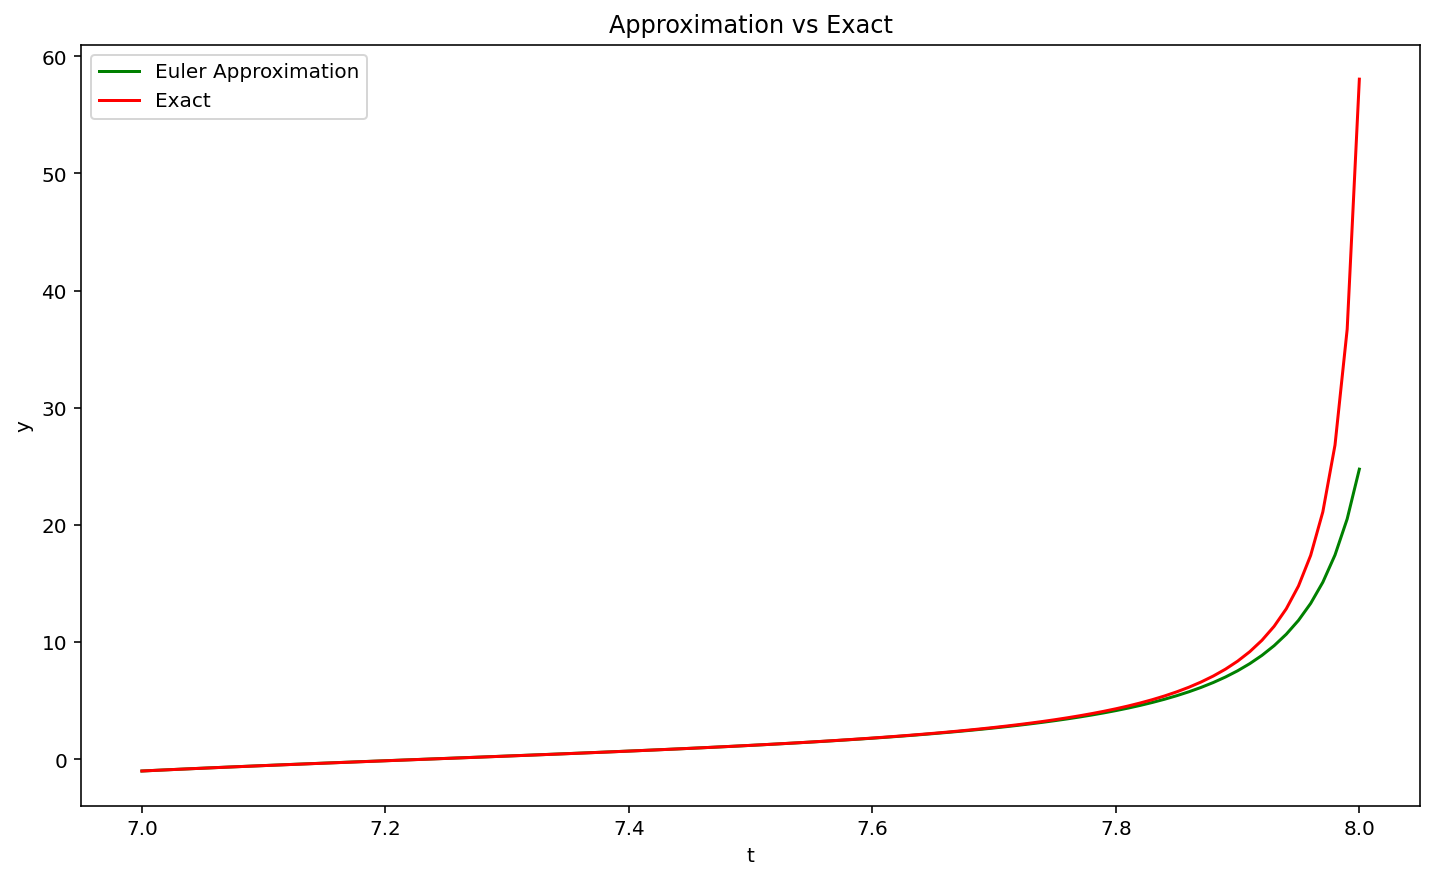

In [11]:
problem4(f,h,t0,y0,n,tsol,ysol)

# Comment about the accuracy here: 

The approximation is fairly accurate until we get to large values of $t$. Then the plot starts to deviate from the exact solution. 

## Problem 5 ##
### Martingale Strategy ###
Suppose Alice and Bob are playing a game that involves flipping a fair coin. Before each flip, Alice some number of points on the flip. If the flip is heads, Bob will pay out this number of points to Alice. If the flip is tails, then Alice must pay Bob the wager. Alice decides to try a Martingale strategy. The strategy is as follows: Every time the coin flips tails, Alice will double her wager on the next flip to cover her losses. If the coin flips heads, Alice will reset her wager to $1$ point on the next flip. If Alice starts the game with $10$ points, find the expected number of turns before she goes bankrupt.

**Note** This is a very high variance strategy. If Alice gets on a "hot streak", this could last a surprisingly long time. Be sure to run at least $30$ trials when computing this expectation. (To find this with simulation, it would be wise to do more).

https://en.wikipedia.org/wiki/Martingale_(betting_system)

In [12]:
def problem5():
    ''' Find the expected number of turns that Alice and Bob's game will last.
    
    inputs: none
    
    outputs:
        turns: The expected number of turns the game will last
    
    '''
    import numpy as np
    import random as random
    numturns = []
    coin = ['h','t']
    for i in range(10000):
        turns = 0
        bet = 1
        alice = 10
        while alice >0:
            turns += 1
            if random.choice(coin) == 'h':
                alice += bet
                bet = 1
            else:
                alice -= bet
                bet *=2
        numturns.append(turns)
    
    turns = np.average(numturns)
    
    return turns

In [13]:
#I found the sample mean from collecting 10000 samples each with size 100. I did this process 5 times. Here are each of the sample means
ck.p5()
#One of the trials had some extreme outliers and this has affected the sample mean. Your expectation will likely be lower.
print(f'If we run the code from the above cell, we get an expected value of {problem5()}')

[3357, 3864, 4835, 28745, 1953]
This gives an expected value of 8551.


If we run the code from the above cell, we get an expected value of 2769.9282


## Problem 6 ##
### Volume of a Hypersphere ###
A hypersphere is the higher dimension analogue of a sphere. In a $n$ dimensional hyper sphere, every point contained within it's volume must satisfy the following:
$$ \sqrt{\sum_{i=1}^{n+1} {x_i^2}} \leq R $$

It is tricky to find the formula for the volume of a hypersphere, but Monte-Carlo methods can help us approximate the volume. Using Montecarlo methods, find the volume of the $4$ dimensional unit hypersphere. (Be sure to use a sample of at least $100,000$ points).

https://en.wikipedia.org/wiki/Volume_of_an_n-ball

In [14]:
def problem6():
    '''Approximate the volume of the 4-dimension unit hypersphere
    
    inputs: none
    
    outputs:
        vol: The approximate volume of the unit hypersphere. 
    
    '''
    import random as random
    count = 0
    R = 1
    numpoints = 1000000
    for i in range(numpoints):

        if sum([random.random()**2 for i in range(4)]) <= R:
            count += 1

    vol = (count /numpoints) * 2**4
    
    return vol

In [15]:
ck.p6(problem6)

Test Successful.


## Bonus Problem 1 ##
### Improved Euler's Method ###
Improved Euler's Method allows for more accurate approximations of differential equations. Given the same inputs as problem 3, compute the approximate solution to the input differential equation using improved Euler's method. An explanation of improved Euler's method can be found here: https://math.libretexts.org/Courses/Monroe_Community_College/MTH_225_Differential_Equations/03%3A_Numerical_Methods/3.02%3A_The_Improved_Euler_Method_and_Related_Methods

In [16]:
def bonusproblem1(f,h,t0,y0,n):
    '''Find the approximate solution to the differential equation using Improved Euler's method. This should be returned as a numpy array of y-values.
    
    inputs:
        f: A function with two inputs, t and x. If you take f(t,x) this will return the value of the appropriate function
        h The step size
        t0: The initial t value
        y0: The initial y value
        n: The number of steps
    outputs:
        ts: A numpy array with n+1 entries corresponding to the t-values found.
        ys: A numpy array with n+1 entries corresponding to the y-values found.'''
    
    import numpy as np
    
    ts = np.zeros(n+1)
    ys = np.zeros(n+1)
    
    #Initial t and y values
    ts[0], ys[0] = t0,y0
    
    #Get the t values
    for i in range(n):
        ts[i+1] = ts[i] + h
    
    #Compute the y values
    for i in range(n):
        k1 = f(ts[i],ys[i])
        k2 = f(ts[i]+h,ys[i]+h*k1)
        ys[i+1] = ys[i] + h/2*(k1+k2)
        
    
    return ts,ys


In [17]:
ck.b1(bonusproblem1)

Test case 1 was successful.
Test case 2 was successful.
Test case 3 was successful.
Test case 4 was successful.
Test case 5 was successful.
Test case 6 was successful.


## Bonus Problem 2 ##
### Chess Markov Chain ###
A standard chess board consists of an $8 \times 8$ grid of squares. When describing these locations, each square will be in a column (which is denoted with a letter from a to h inclusive), and a row (denoted with a number from $1$ to $8$ inclusive). A king can move from its current square to any square that is adjacent to the current square horizontally, vertically, or diagonally. https://www.chess.com/terms/chess-king

Create a Markov chain for the movement of the king, if the king make a legal move uniformly at random at each time step. If the king starts in the 'a1' square, what is the long term distribution of the king's movements? Store these in a dictionary of the form below (where the values are the long term probabilities):
$$ \text{longterm} = \{'a1':0.02,'a2':0.03,...\} $$

In [18]:
def bonusproblem2():
    '''This function will find the long term probabilities of the king being in a given chess square.
    
    inputs: None
    
    outputs:
        longterm: This is the dictionary with the long term probabilities of the king being in each square. 
        '''
    import numpy as np
    
    #Get the ranks and files
    files = ['a','b','c','d','e','f','g','h']
    ranks = [str(i) for i in range(1,9)]
    #Generate the list of legal squares
    squares = [x+y for x in files for y in ranks]

    #Create a dictionary tracking the legal king moves
    legalmoves = {}
    
    #For each square, generate the legal moves
    for square in squares:
        
        #Find the possible file moves
        
        if square[0] == 'a':
            legalfiles = ['a','b']
        elif square[0] == 'h':
            legalfiles = ['g','h']
        else:
            x = files.index(square[0])
            legalfiles = [files[x-1],files[x],files[x+1]]
        
        #Find the possible rank moves
        if square[1] == '1':
            legalranks = ['1','2']
        elif square[1] == '8':
            legalranks = ['7','8']
        else:
            x = ranks.index(square[1])
            legalranks = [ranks[x-1],ranks[x],ranks[x+1]]
        
        #Generate the legal moves
        legal = [x+y for x in legalfiles for y in legalranks if not x+y == square]
        
        legalmoves[square] = legal
    
    #Create the transition matrix
    
    #There are 64 squares on a chess board
    M = np.zeros((64,64))
    
    for i in range(64):
        square = squares[i]
        
        #Check what the legal moves are from a given starting square
        legal = legalmoves[square]
        numlegal = len(legal)
        
        #Get the transition probablities and put them into a matrix
        for msquare in legal:
            j = squares.index(msquare)
            
            M[j,i] = 1/numlegal
    
    #Find the eigenvector with eigenvalue 1
    eigval,eigvec = np.linalg.eig(M)
    probs = eigvec.transpose()[0]
    #Ensure the sum of entries of the eigenvalue is one
    probs /= sum(probs)
    #Make sure the entries are nicely rounded real numbers
    probs = np.real(probs)
    probs = np.round(probs,5)
    
    #Convert this into the format of the final answer
    longterm = {square:probs[squares.index(square)] for square in squares}
    
    return longterm

In [19]:
ck.b2(bonusproblem2)

Test Successful.
